In [1]:
from sklearn.datasets import fetch_openml, make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone

import itertools as it
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import f_oneway

from tqdm.notebook import tqdm

In [2]:
def get_random_dataset(n, d, k):
    
    X = np.random.rand(n, d)
    y = np.random.randint(0, k, n)
    
    return X, y

def get_one_hot_encoding(y, k=None):
    if k is None:
        k = len(np.unique(y))
    y_onehot = np.zeros((len(y), k))
    for label in range(k):
        mask = y == label
        y_onehot[mask, label] = 1
    return y_onehot

In [3]:
X, y = make_classification(1000, 2, n_redundant=0, n_repeated=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0, test_size=0.8)

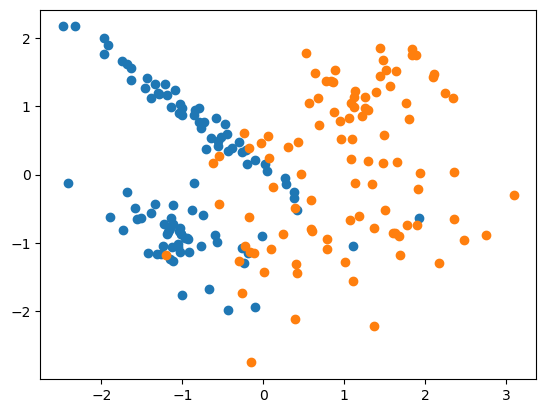

In [11]:
fig, ax = plt.subplots()
for l in np.unique(y):
    mask = y_train == l
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
plt.show()

In [12]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import f_oneway

# Step 1: Train a decision tree classifier
X_train, y_train = make_classification(n_samples=1000, n_features=4, random_state=42)
#clf = DecisionTreeClassifier(random_state=42)
clf = RandomForestClassifier(random_state=42, max_depth=1)
clf.fit(X_train, y_train)

# Step 2: Generate i.i.d. test data
for i in range(10):
    X_test, _ = make_classification(n_samples=10**6, n_features=4, random_state=i)

    # Step 3: Make predictions
    predictions = clf.predict(X_test)

    # Step 4: Split predictions into groups and compare their means
    num_groups = 10**2
    group_size = len(predictions) // num_groups
    groups = [predictions[i*group_size:(i+1)*group_size] for i in range(num_groups)]

    # Calculate means of the groups
    group_means = [np.mean(group) for group in groups]
    print("Group means:", group_means)

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    # Interpretation
    if p_value > 0.05:
        print("No significant difference in means across groups (p-value > 0.05)")
    else:
        print("!!!! Significant difference in means across groups (p-value <= 0.05)")

Group means: [0.5206, 0.5175, 0.5209, 0.5238, 0.5315, 0.5198, 0.5106, 0.5246, 0.5233, 0.5221, 0.5188, 0.516, 0.5209, 0.5221, 0.525, 0.514, 0.5185, 0.5274, 0.5244, 0.5195, 0.5165, 0.5214, 0.5243, 0.5222, 0.5319, 0.5161, 0.5221, 0.5277, 0.5207, 0.5149, 0.5147, 0.5195, 0.5224, 0.5269, 0.5142, 0.5309, 0.5211, 0.5286, 0.5162, 0.521, 0.526, 0.5241, 0.5162, 0.5263, 0.5172, 0.5164, 0.514, 0.5256, 0.515, 0.5216, 0.5249, 0.523, 0.5275, 0.5214, 0.5288, 0.5256, 0.52, 0.5243, 0.5169, 0.512, 0.5156, 0.5268, 0.5193, 0.5245, 0.5197, 0.5169, 0.517, 0.5188, 0.524, 0.5185, 0.5189, 0.5253, 0.5212, 0.5138, 0.5258, 0.5271, 0.5215, 0.5161, 0.5121, 0.5238, 0.5229, 0.5229, 0.5268, 0.5193, 0.5203, 0.52, 0.5271, 0.52, 0.5186, 0.5263, 0.5158, 0.5203, 0.5176, 0.5215, 0.5302, 0.5275, 0.5174, 0.5246, 0.5285, 0.5244]
ANOVA F-statistic: 0.8907566841444952
P-value: 0.7735646866883695
No significant difference in means across groups (p-value > 0.05)
Group means: [0.5914, 0.5913, 0.5924, 0.5835, 0.5891, 0.5869, 0.5875, 0

Group means: [0.5819, 0.5704, 0.5796, 0.5884, 0.5821, 0.5682, 0.5794, 0.5813, 0.5865, 0.5818, 0.5806, 0.5752, 0.5736, 0.5777, 0.5793, 0.5937, 0.581, 0.5849, 0.5766, 0.5756, 0.5848, 0.5752, 0.5819, 0.5772, 0.5708, 0.5835, 0.5887, 0.5832, 0.5793, 0.5805, 0.576, 0.5743, 0.5715, 0.5683, 0.5743, 0.5793, 0.5907, 0.5795, 0.5792, 0.5814, 0.5764, 0.5809, 0.5773, 0.5756, 0.5761, 0.5761, 0.5747, 0.5731, 0.5773, 0.5692, 0.5728, 0.5828, 0.5808, 0.5837, 0.5813, 0.5854, 0.5757, 0.5677, 0.5802, 0.5836, 0.5748, 0.5805, 0.578, 0.5806, 0.588, 0.5848, 0.5692, 0.5762, 0.5759, 0.5898, 0.5904, 0.5756, 0.5798, 0.5782, 0.5872, 0.5848, 0.5776, 0.5794, 0.584, 0.5755, 0.5772, 0.583, 0.5738, 0.5772, 0.5789, 0.5793, 0.5738, 0.5734, 0.5764, 0.5864, 0.5683, 0.5815, 0.5691, 0.5828, 0.5832, 0.5832, 0.5763, 0.5725, 0.5867, 0.5701]
ANOVA F-statistic: 1.2727002649647872
P-value: 0.034847373158133285
!!!! Significant difference in means across groups (p-value <= 0.05)


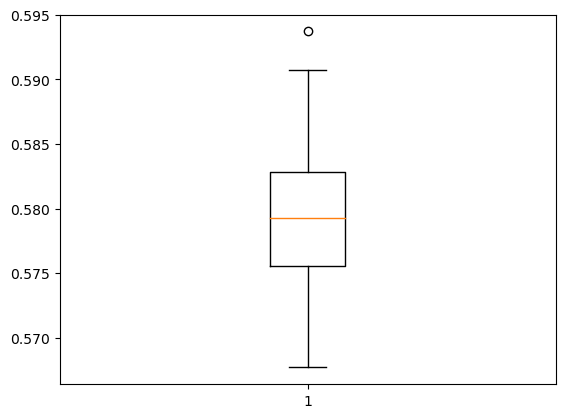

In [53]:
fig, ax = plt.subplots()
ax.boxplot(group_means)
plt.show()

# Brier Score

In [177]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import f_oneway

d = 2
k = 2

# Step 1: Train a decision tree classifier
#X, y = get_random_dataset(10**5, d=d, k=k)
X, y = fetch_openml(data_id=722, return_X_y=True)
#X, y = make_classification(n_samples=10**5, n_features=4, n_redundant=0, n_informative=4, random_state=41)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=3, train_size=10**3)

k = len(np.unique(y))

#clf = DecisionTreeClassifier(random_state=42)
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Step 2: Generate i.i.d. test data
for i in range(1):
    #X_test, y_test = get_random_dataset(10**6, d=d, k=k)
    #X_test, y_test = make_classification(n_samples=10**6, n_features=4, n_redundant=0, n_informative=4, random_state=42)

    # Step 3: Make predictions
    gaps_array = np.abs((clf.predict_proba(X_test) - get_one_hot_encoding(y_test)))
    
    for i in range(k):
        gaps = gaps_array[:,i]

        # Step 4: Split predictions into groups and compare their means
        num_groups = 10
        group_size = len(gaps) // num_groups
        groups = [gaps[i*group_size:(i+1)*group_size] for i in range(num_groups)]

        # Calculate means of the groups
        group_means = [np.mean(group, axis=0) for group in groups]
        group_vars = [np.var(group, axis=0) for group in groups]
        print("Group means:", np.round(group_means, 4))
        print("Group vars:", np.round(group_vars, 4))

        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        print(f"ANOVA F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")

        # Interpretation
        if p_value > 0.05:
            print("No significant difference in means across groups (p-value > 0.05)")
        else:
            print("!!!! Significant difference in means across groups (p-value <= 0.05)")
    
    term1 = (gaps_array.mean(axis=0)**2).sum()
    term2 = (gaps_array.var(axis=0)).sum()
    print(f"E[Z_inf] estimate is {term1}")
    print(f"E[Z_10] estimate is {term1 + term2}")

Group means: [0.355  0.3432 0.3335 0.3292 0.3472 0.3455 0.3491 0.3333 0.3297 0.3461]
Group vars: [0.1535 0.1482 0.1487 0.144  0.1503 0.1499 0.1474 0.1442 0.1439 0.1502]
ANOVA F-statistic: 0.7692776455604524
P-value: 0.6450821703407774
No significant difference in means across groups (p-value > 0.05)
Group means: [0.645  0.6568 0.6665 0.6708 0.6528 0.6545 0.6509 0.6667 0.6703 0.6539]
Group vars: [0.1535 0.1482 0.1487 0.144  0.1503 0.1499 0.1474 0.1442 0.1439 0.1502]
ANOVA F-statistic: 0.7692776455604524
P-value: 0.6450821703407774
No significant difference in means across groups (p-value > 0.05)
E[Z_inf] estimate is 0.5504495814140389
E[Z_10] estimate is 0.8466723102857119


In [178]:
#clf = RandomForestClassifier(n_estimators=1000, random_state=41, max_depth=1).fit(X_train, y_train)
((clf.predict_proba(X_test) - get_one_hot_encoding(y_test))**2).sum(axis=1).mean()

0.8466723102857142

In [223]:
def test_iid(values, num_groups=10, verbose=False):
    
    group_size = len(values) // num_groups
    groups = [values[i*group_size:(i+1)*group_size] for i in range(num_groups)]

    # Calculate means of the groups
    group_means = [np.mean(group, axis=0) for group in groups]
    group_vars = [np.var(group, axis=0) for group in groups]
    if verbose:
        print("Group means:", np.round(group_means, 4))
        print("Group vars:", np.round(group_vars, 4))

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)
    if verbose:
        print(f"ANOVA F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")

    # Interpretation
    if verbose:
        if p_value > 0.05:
            print("No significant difference in means across groups (p-value > 0.05)")
        else:
            print("!!!! Significant difference in means across groups (p-value <= 0.05)")
    return p_value > 0.05


class TheoremChecker:
    
    def __init__(self, ensemble, X, y, random_state=0):
        
        self.ensemble = ensemble
        self.X = X
        self.y = y
        self.random_state = random_state
    
    def check_independence_in_instances(self):
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            self.X,
            self.y,
            random_state=self.random_state,
            stratify=y,
            train_size=10**3
        )
        
        # check that input is IID
        iid_input = test_iid(y_test)
        print("input:", np.mean(iid_input))
        
        # train learners
        ensemble = clone(self.ensemble).fit(X_train, y_train)
        
        # get predictions per ensemble member
        y_pred = np.array([l.predict_proba(X_test) for i, l in enumerate(ensemble)])
        gaps = np.abs(y_pred - get_one_hot_encoding(y_test))
        print(gaps.shape)
        print((gaps.mean(axis=(0,1))**2).sum(), (gaps.mean(axis=0)**2).sum(axis=1).mean())
        
        # check IID of test instances for each ensemble member
        #iid_results_per_ensemble_member = [test_iid(y_pred_em[:,0]) for y_pred_em in y_pred]
        #iid_results_per_ensemble_member_gaps = [test_iid(gap_em[:,0]) for gap_em in gaps]
        #print(np.mean(iid_results_per_ensemble_member), np.mean(iid_results_per_ensemble_member_gaps))
        
        # check IID of ensemble member predictions for each instance
        #iid_results_per_instance = [test_iid(y_pred_in[:,0]) for y_pred_in in y_pred.transpose(1, 0, 2)]
        #iid_results_per_instance_gaps = [test_iid(gap_in[:,0]) for gap_in in gaps.transpose(1, 0, 2)]
        #print(np.mean(iid_results_per_instance), np.mean(iid_results_per_instance_gaps))
        
        # check IID of test instances after having averaged out ensemble members
        gaps_avg_over_ensemble = gaps.mean(axis=0)
        print("After averaging out ensemble members")
        print(test_iid(gaps_avg_over_ensemble[:,0], verbose=True), test_iid(gaps_avg_over_ensemble[:,1], verbose=True))
        print(f"score: {(gaps_avg_over_ensemble**2).mean(axis=0)}")
        print(f"unified: {(gaps.mean(axis=(0,1))**2).mean(axis=0)}")
        if False:
            fig, ax = plt.subplots(figsize=(10, 4))
            #ax.boxplot((gaps_avg_over_ensemble**2), showmeans=True)
            #ax.imshow(gaps[:,:,0], cmap="Reds", aspect="auto")
            t, n, k = gaps.shape
            gap_matrix = np.zeros((n, n))
            for i in range(n):
                for ip in range(n):
                    gap_matrix[i,ip] = np.dot(gaps[:,i,0], gaps[:,ip,0])
            sb.heatmap(gap_matrix / t**2, cmap="Reds", ax=ax)#, aspect="auto")
            print(np.trace(gap_matrix), np.sum(gap_matrix) / n)

            plt.show()
        
        iid_results_mixture = test_iid(y_pred[:,:,0].flatten())
        print(np.mean(iid_results_mixture))
        
        iid_results_mixture = test_iid(y_pred.reshape(-1, 2)[:,0])
        print(np.mean(iid_results_mixture))
        
        
            #y_pred = np.array([l.predict_proba(X_test) for i, l in enumerate(ensemble)])
        #test_iid(y_pred[:,:,0].flatten())
    
    def sample_from_zt(self, num_groups = 10):
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            self.X,
            self.y,
            random_state=0,
            stratify=y,
            train_size=10**3
        )
        
        # partition test points
        group_size = len(X_test) // num_groups
        print(f"n = {group_size}")
        group_ids = np.array([i % num_groups for i in range(len(X_test))])

        # get estimate of LHS
        scores = []
        for i in tqdm(range(num_groups)):

            # train base learners from scratch (data does not change but randomness in learner gets us a different ensemble)
            ensemble = clone(self.ensemble).fit(X_train, y_train)
            
            # get predictions
            mask = group_ids == i
            y_pred = np.mean([l.predict_proba(X_test[mask]) for l in ensemble], axis=0)            
            scores.append(((y_pred - get_one_hot_encoding(y_test[mask]))**2).sum(axis=1).mean())
        return scores
    
    def estimate_mean_by_rhs_without_merge(self):
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            self.X,
            self.y,
            random_state=self.random_state,
            stratify=y,
            train_size=10**3
        )
        
        # build ensemble (once)
        ensemble = clone(self.ensemble).fit(X_train, y_train)
        y_pred = np.array([l.predict_proba(X_test) for l in ensemble])
        t = len(ensemble)

        # get one hot encoding of labels
        y_ohe = get_one_hot_encoding(y_test)
        k = y_ohe.shape[1]

        gaps_array = np.array([np.abs((y_pred_row - y_ohe)) for y_pred_row in y_pred])
        term1 = (gaps_array.mean(axis=0)**2).sum(axis=1).mean()
        term2 = (gaps_array.var(axis=0)**2).sum(axis=1).mean() / t
        print(term1, term2)
        return term1 + term2

    def estimate_mean_by_rhs(self, num_groups = 10):
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(
            self.X,
            self.y,
            random_state=self.random_state,
            stratify=self.y,
            train_size=10**3
        )
        
        # build ensemble (once)
        ensemble = clone(self.ensemble).fit(X_train, y_train)
        y_pred = np.array([l.predict_proba(X_test) for l in ensemble])
        t = len(ensemble)

        # get one hot encoding of labels
        y_ohe = get_one_hot_encoding(y_test)
        k = y_ohe.shape[1]

        gaps_array = np.array([np.abs((y_pred_row - y_ohe)) for y_pred_row in y_pred])
        #print(gaps_array, gaps_array.shape)
        return ((gaps_array.mean(axis=0)**2).sum(axis=1).mean())
        
        #print(gaps_array.mean(axis=(0,1)), gaps_array.mean(axis=(0,1)).sum())
        term1 = (gaps_array.mean(axis=(0,1))**2).sum()
        term2 = (gaps_array.var(axis=(0,1))).sum() / t
        
        #print("Correct would be", (gaps_array.mean(axis=0)**2).sum(axis=1).mean())
        #print(f"E[Z_inf] estimate is {term1}")
        #print(f"E[Z_10] estimate is {term1 + term2}")

        #print(term1, term2)
        #print(term1 + term2)


X, y = make_classification(n_samples=10**5, random_state=0)
tc = TheoremChecker(RandomForestClassifier(n_estimators=100, random_state=0), X, y, random_state=0)

In [224]:
tc.check_independence_in_instances()

input: 1.0
(100, 99000, 2)
0.07356626576463625 0.15930773333333334
After averaging out ensemble members
Group means: [0.1952 0.1916 0.1889 0.1927 0.1937 0.1931 0.1911 0.1909 0.1894 0.1914]
Group vars: [0.0432 0.0428 0.0422 0.0431 0.0438 0.0434 0.0433 0.0419 0.0423 0.0426]
ANOVA F-statistic: 0.8656629426859157
P-value: 0.5553446116928638
No significant difference in means across groups (p-value > 0.05)
Group means: [0.1952 0.1916 0.1889 0.1927 0.1937 0.1931 0.1911 0.1909 0.1894 0.1914]
Group vars: [0.0432 0.0428 0.0422 0.0431 0.0438 0.0434 0.0433 0.0419 0.0423 0.0426]
ANOVA F-statistic: 0.8656629426859157
P-value: 0.5553446116928638
No significant difference in means across groups (p-value > 0.05)
True True
score: [0.07965387 0.07965387]
unified: 0.036783132882318124
0.0
0.0


In [ ]:
X, y = make_classification(n_samples=10200, n_features=2, n_redundant=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1,
    stratify=y,
    train_size=10**3
)

num_groups = 1
group_size = len(X_test) // num_groups
for i in range(num_groups):
    
    #rf = RandomForestClassifier(n_estimators=10**1).fit(X_train, y_train)
    clf = ExtraTreesClassifier(n_estimators=200).fit(X_train, y_train)# for _ in range(10)]
    X_test_fold = X_test[i*group_size:(i+1)*group_size]
    y_test_fold = y_test[i*group_size:(i+1)*group_size]
    y_pred = np.array([l.predict_proba(X_test_fold) for l in clf])
    gaps = y_pred - get_one_hot_encoding(y_test_fold)
    
    mu_squared = gaps.mean(axis=(0, 1))**2
    sigma_squared = gaps.var(axis=(0, 1))
    cov = gaps.mean(axis=0).var(axis=0) - sigma_squared / len(clf)
    
    
    t = gaps.shape[0]
    #for s1, s2 in it.combinations(range(t), 2):
     #   print((gaps[:,s1,:] * gaps[:,s2,:]).sum(axis=1))
    #for e in gaps[:,:,0].transpose(1, 0):
        
    #print((gaps.mean(axis=0)**2).sum(axis=1).var())
    
    t = len(clf)
    
    if True:
        rows = []
        for s1, s2 in it.combinations(range(t), 2):
            rows.extend(np.array([gaps[s1,:,0], gaps[s2,:,0]]).T)
        rows = np.array(rows)
    
    
        print((t-1)/t * np.cov(rows, rowvar=False)[0,1])
        print(cov)

    #    clf = ExtraTreesClassifier(n_estimators=1000).fit(X_train, y_train)# for _ in range(10)]
     #   y_pred = np.array([l.predict_proba(X_test_fold) for l in clf])
      #  gaps = y_pred - get_one_hot_encoding(y_test_fold)

        print(
            gaps.shape,
            round((gaps.mean(axis=0)**2).mean(axis=0)[0], 4),
            round((gaps.mean(axis=0)**2).mean(axis=0)[0], 4),

    #        np.round(gaps.mean(axis=(0, 1))**2 + gaps.mean(axis=0).var(axis=0) + 1/len(clf) * (gaps.var(axis=0).mean(axis=0)**2 + gaps.var(axis=0).var(axis=0)), 4)[0],
            np.round(gaps.mean(axis=(0, 1))**2 + gaps.mean(axis=0).var(axis=0), 4)[0],
            np.round(mu_squared[0] + sigma_squared[0] / t + (t-1)/t * np.cov(rows, rowvar=False)[0,1], 4)
     #       np.round(mu_squared + sigma_squared / len(clf) + cov, 4)[0],
      #      np.round(gaps.mean(axis=0).var(axis=0), 4)[0], np.round((gaps.mean(axis=0)**2).mean(axis=0)[0], 4)
        )
        print(f"Cov: {round(np.cov(rows, rowvar=False)[0,1], 4)}, {sigma_squared[0]}")

# Analysis of $\mathbb{V}[Z_{nt}]$ as function of $n$ adn $t$

## Pre-Computed Trees

In [ ]:
X, y = make_classification(n_samples=10**4, n_features=5, n_informative=5, n_redundant=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1,
    stratify=y,
    train_size=10**3
)

domain_n = list(np.arange(1, 11))# + list(np.arange(20, 101, 10))# + list(np.arange(200, 1001, 100))
domain_t = list(np.arange(1, 11)) + list(np.arange(20, 101, 10)) + list(np.arange(200, 1001, 100)) + [10**4]
num_groups = 10

scores = np.zeros((num_groups, len(domain_n), len(domain_t)))

print("start training")
clf = ExtraTreesClassifier(n_estimators=10**5 + 1).fit(X_train, y_train)# for _ in range(10)]
print("trained, making predictions")
y_pred = np.array([l.predict_proba(X_test) for l in tqdm(clf)])
print("ok. y_pred has shape", y_pred.shape)

pbar = tqdm(total=len(domain_n) * len(domain_t) * num_groups)
for j, n in enumerate(domain_n):
    for k, t in enumerate(domain_t):
        for i in range(num_groups):
            
            if (i+1)*t >= len(clf):
                raise ValueError("Not enough trees.")
                
            if (i+1)*n >= len(X_test):
                raise ValueError("Not enough instances.")
            
            group_size = n
            y_test_fold = y_test[i*n:(i+1)*n]
            #print(t, n, y_pred.shape)
            y_pred_fold = y_pred[i*n:(i+1)*n][:,i*t:(i+1)*t].transpose(1, 0, 2)
            #print(n, t, y_test_fold.shape)
            gaps = y_pred_fold - get_one_hot_encoding(y_test_fold, k=2)
            score = (gaps.mean(axis=0)**2).sum(axis=1).mean()
            scores[i,j,k] = score
            pbar.update(1)
pbar.close()

start training


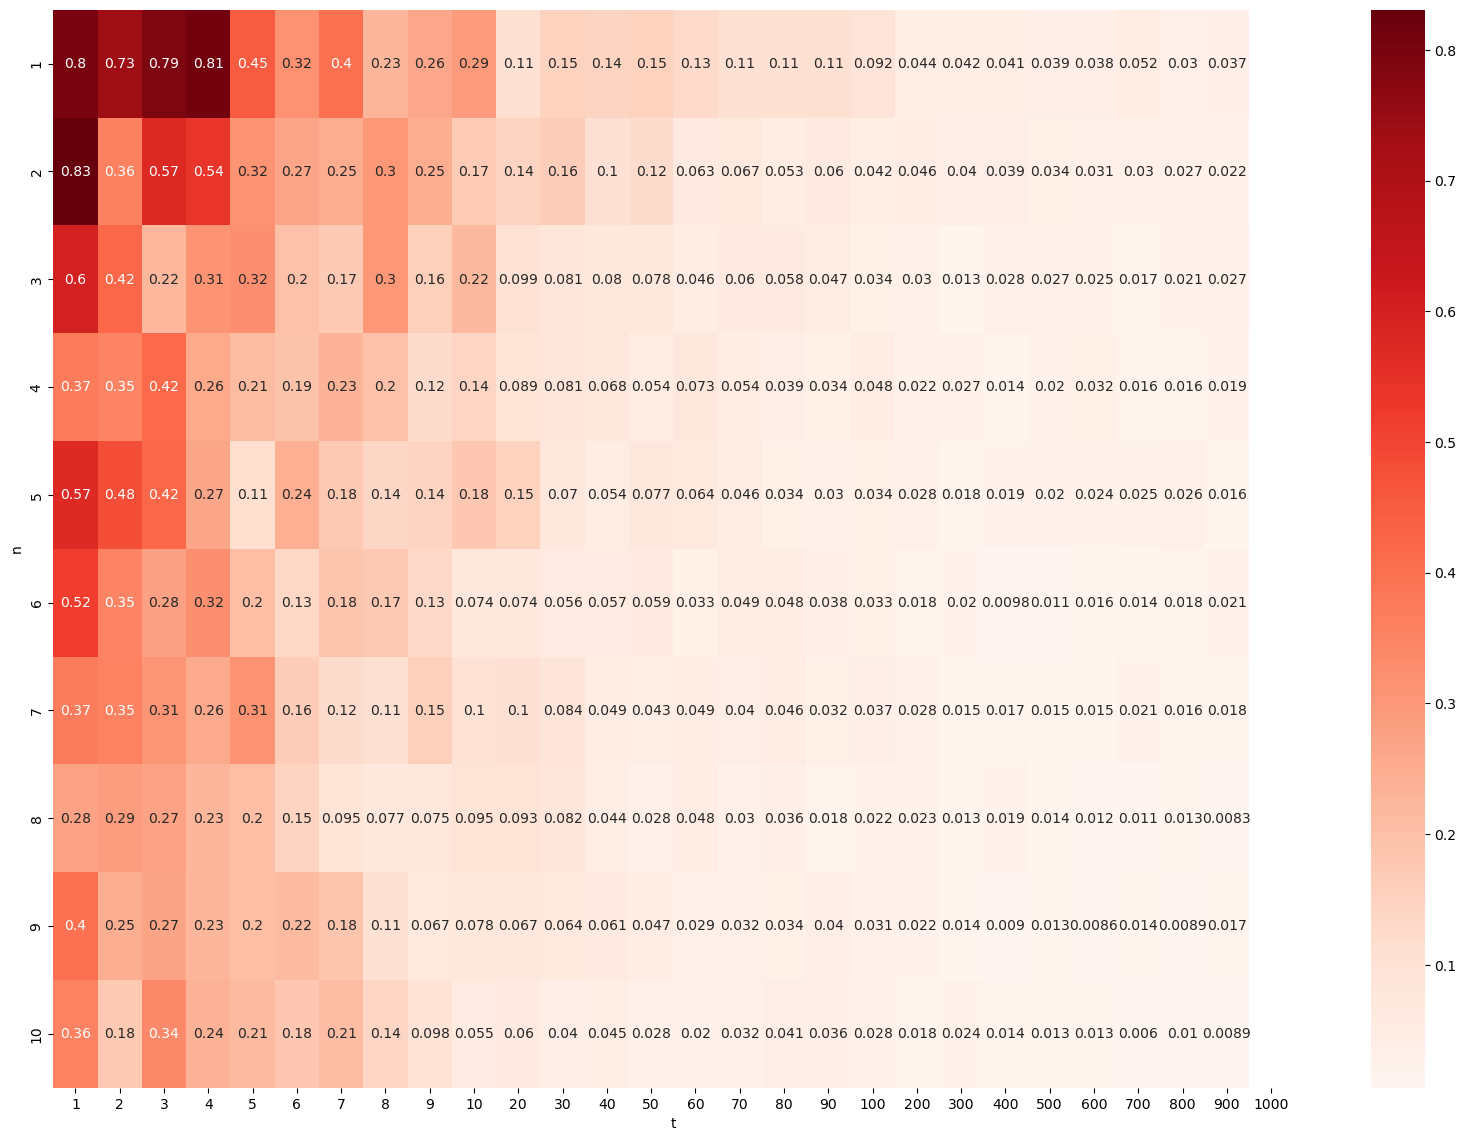

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 14))
sb.heatmap(scores.std(axis=0), cmap="Reds", annot=True, ax=ax)
ax.set_xticklabels(domain_t)
ax.set_xlabel("t")
ax.set_yticklabels(domain_n)
ax.set_ylabel("n")
plt.show()

<IPython.core.display.Javascript object>


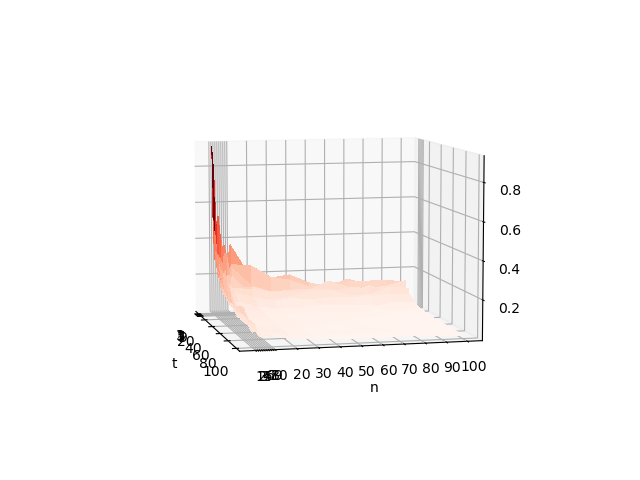

Text(0.5, 0.5, 'n')

In [6]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(domain_t, domain_n)

# Plot the surface.
surf = ax.plot_surface(X, Y, scores.std(axis=0), cmap="Reds", linewidth=0, antialiased=False)
ax.set_xticks(domain_t[::2])
ax.set_xticklabels(domain_t[::2])
ax.set_xlabel("t")
ax.set_yticks(domain_n)
ax.set_yticklabels(domain_n)
ax.set_ylabel("n")

## From Scratch Trees

In [9]:
X, y = make_classification(n_samples=10**4, n_features=5, n_informative=5, n_redundant=0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1,
    stratify=y,
    train_size=10**3
)

domain_n = list(np.arange(1, 11))# + list(np.arange(20, 101, 10))# + list(np.arange(200, 1001, 100))
domain_t = list(np.arange(1, 11))# + list(np.arange(20, 101, 10))# + list(np.arange(200, 1001, 100)) + [10**4]
num_groups = 10

scores = np.zeros((num_groups, len(domain_n), len(domain_t)))

pbar = tqdm(total=len(domain_n) * len(domain_t) * num_groups)
for j, n in enumerate(domain_n):
    for k, t in enumerate(domain_t):
        for i in range(num_groups):
            clf = ExtraTreesClassifier(n_estimators=t).fit(X_train, y_train)# for _ in range(10)]
            X_test_fold = X_test[i*n:(i+1)*n]
            y_test_fold = y_test[i*n:(i+1)*n]
            y_pred_fold = np.array([l.predict_proba(X_test_fold) for l in clf])#.transpose(1, 0, 2)
            gaps = y_pred_fold - get_one_hot_encoding(y_test_fold, k=2)
            
            score = (gaps.mean(axis=1)**2).sum(axis=1).mean()
            scores[i,j,k] = score
            pbar.update(1)
pbar.close()
scores = np.array(scores)

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

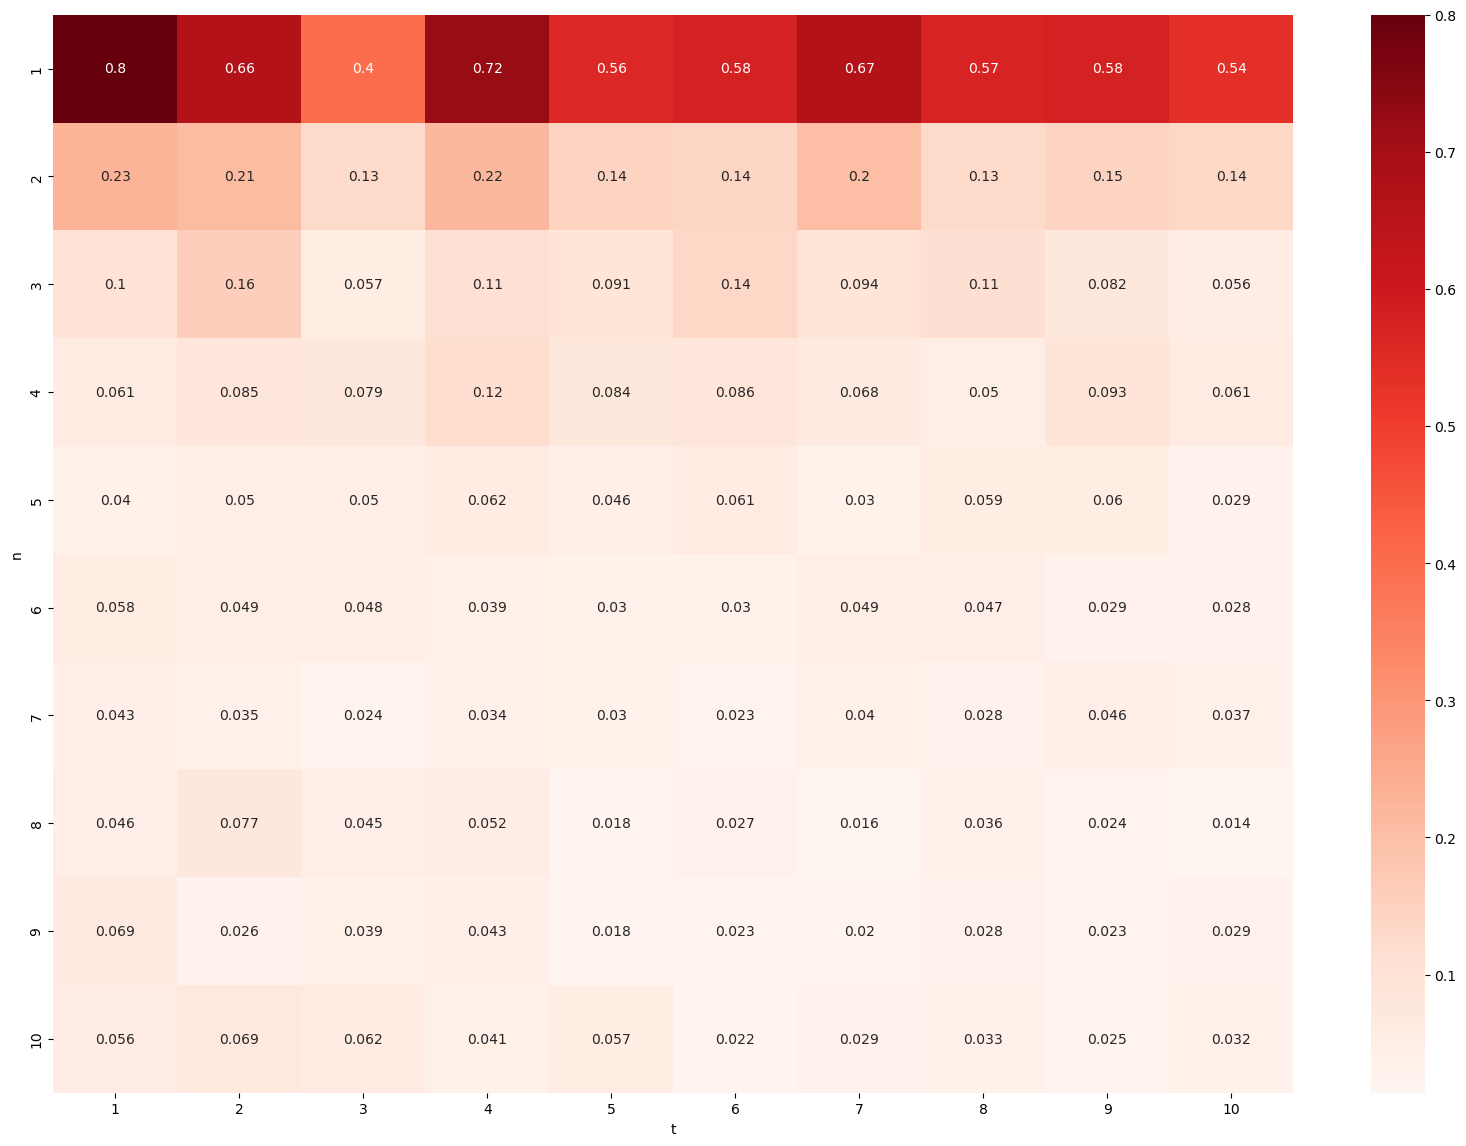

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 14))
sb.heatmap(scores.std(axis=0), cmap="Reds", annot=True, ax=ax)#, vmax=0.05)
ax.set_xticklabels(domain_t)
ax.set_xlabel("t")
ax.set_yticklabels(domain_n)
ax.set_ylabel("n")
plt.show()